In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [13]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [14]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2013-06-18', '2014-06-18'))

[(57.0, 72.84687735139202, 86.0)]


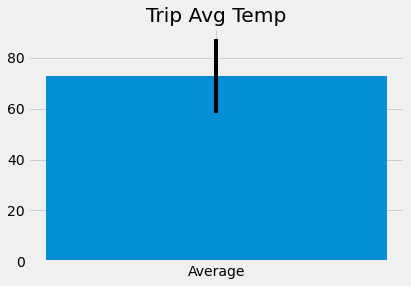

In [48]:
# Plot the results from your previous query as a bar chart. 
new_list = calc_temps('2013-06-18', '2014-06-18')[0]
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.title("Trip Avg Temp")
error_val = (new_list[2] - new_list[0])/2
plt.bar("Average", new_list[1], yerr = error_val)
plt.show()

### Daily Rainfall Average

In [100]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp]
total_prcp = session.query(*sel).filter(Station.station == Measurement.station).filter(Measurement.date >= "2017-06-18")\
    .filter(Measurement.date <= "2017-06-28")\
        .group_by(Station.station)\
        .order_by(Measurement.prcp.desc()).all()
total_prcp

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.7),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.25),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.24),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.18),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.05),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [98]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [126]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = '2017-07-18'
end_date = '2017-07-28'
# Retrieve number of days dynamically
start_date_obj = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = dt.datetime.strptime(end_date, '%Y-%m-%d')
no_days = end_date_obj - start_date_obj
no_days_var = no_days.days
type(no_days_var)

int

In [165]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = '2017-07-18'
end_date = '2017-07-28'
# Retrieve number of days dynamically
start_date_obj = dt.datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = dt.datetime.strptime(end_date, "%Y-%m-%d")
no_days = end_date_obj - start_date_obj
no_days_var = no_days.days

# Use the start and end date to create a range of dates
# Adding 1 to number of days to include start date
date_range = [end_date_obj - dt.timedelta(days = vacday) for vacday in range(no_days_var + 1)]
date_range

# Strip off the year and save a list of strings in the format %m-%d
m_d_list = [str(f'{x.strftime("%m")}-{x.strftime("%d")}') for x in date_range]  

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = [daily_normals(x)[0] for x in m_d_list]
normals


[(69.0, 76.46428571428571, 82.0),
 (68.0, 76.58181818181818, 83.0),
 (71.0, 76.4423076923077, 86.0),
 (67.0, 76.89090909090909, 84.0),
 (69.0, 76.55555555555556, 81.0),
 (70.0, 76.20370370370371, 84.0),
 (69.0, 75.78846153846153, 81.0),
 (69.0, 76.9245283018868, 83.0),
 (69.0, 75.46296296296296, 82.0),
 (68.0, 75.89090909090909, 83.0),
 (72.0, 76.63793103448276, 83.0)]

In [170]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns = ["tmin", "tavg", "tmax"])
# Reverse order for the chart to read dates early to later from left to right
trip_df_ordered = trip_df.sort_index(ascending = False)
trip_df_ordered["date"] = m_d_list[::-1]
re_index = trip_df_ordered.set_index("date")
re_index

,tmin,tavg,tmax
date,,,
07-18,72.0,76.637931,83.0
07-19,68.0,75.890909,83.0
07-20,69.0,75.462963,82.0
07-21,69.0,76.924528,83.0
07-22,69.0,75.788462,81.0
07-23,70.0,76.203704,84.0
07-24,69.0,76.555556,81.0
07-25,67.0,76.890909,84.0
07-26,71.0,76.442308,86.0


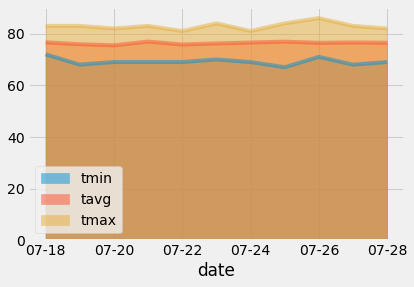

In [171]:
# Plot the daily normals as an area plot with `stacked=False`
re_index.plot.area(stacked = False)
plt.show()

## Close Session

In [ ]:
session.close()